# Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import window_make
import Gradient
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('archive.csv') # co2 data

data.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [3]:
data = data.to_numpy()

co2 = data[:,3]

Text(0.5, 0, 'time series')

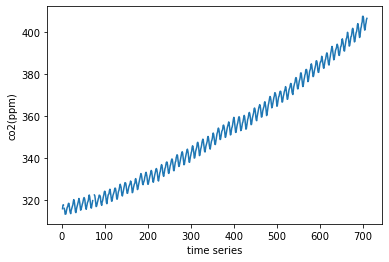

In [4]:
plt.plot(co2)
plt.ylabel('co2(ppm)')
plt.xlabel('time series')

In [5]:
X_i,Y_i = window_make.dowlist_10(co2,1)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_i, Y_i, test_size=0.2, random_state=1)


scaler = MinMaxScaler()
scaler.fit(X_train)
x_scale = scaler.transform(X_train) # scaling train data
x_test = scaler.transform(X_test) # scaling test data using train data mean and std 




print(x_scale[:5])

poly = PolynomialFeatures(5)
x_train = poly.fit_transform(x_scale)
x_test = poly.fit_transform(x_test)
print(x_train[:5])

[[0.80130933]
 [0.78243317]
 [0.1056192 ]
 [0.08085106]
 [0.37337698]]
[[1.00000000e+00 8.01309329e-01 6.42096641e-01 5.14518028e-01
  4.12288096e-01 3.30370298e-01]
 [1.00000000e+00 7.82433170e-01 6.12201665e-01 4.79006889e-01
  3.74790879e-01 2.93248815e-01]
 [1.00000000e+00 1.05619203e-01 1.11554161e-02 1.17822617e-03
  1.24443309e-04 1.31436032e-05]
 [1.00000000e+00 8.08510638e-02 6.53689452e-03 5.28514876e-04
  4.27309900e-05 3.45484600e-06]
 [1.00000000e+00 3.73376978e-01 1.39410367e-01 5.20526216e-02
  1.94352505e-02 7.25667511e-03]]


In [7]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(551, 6)
(138, 6)
(551, 1)
(138, 1)


# Momentum method

In [8]:
from sklearn.metrics import mean_squared_error





In [9]:
loss_history_momentum,w = Gradient.momentum_gradient(x_train,Y_train,lr=0.0001, epoch=5000, batch_size=128,gamma=0.9)

Text(0, 0.5, 'loss')

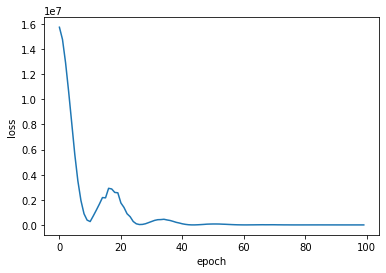

In [10]:
plt.plot(range(len(loss_history_momentum))[:100],loss_history_momentum[:100])
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

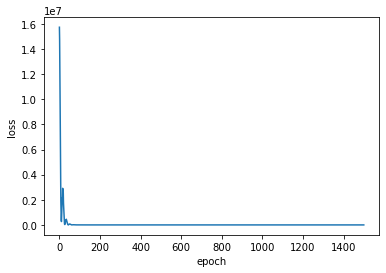

In [11]:
plt.plot(range(len(loss_history_momentum))[:1500],loss_history_momentum[:1500])
plt.xlabel('epoch')
plt.ylabel('loss')

In [12]:
w

array([[314.87528017,  85.67483254,  13.97173556,  -2.33075278,
         -4.00754736,  -1.98976773]])

In [13]:
Y_pred = np.matmul(x_test,w.reshape((6,-1))) 
rmse = mean_squared_error(Y_test, Y_pred)
print(rmse)

1.7946457507015585


# Nestrov Accelerated Gradient

## $\gamma = 0.9$

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
loss_history_nag,w = Gradient.nestrov_gradient(x_train,Y_train,lr=0.0001, epoch=5000, batch_size=128,gamma=0.9) 


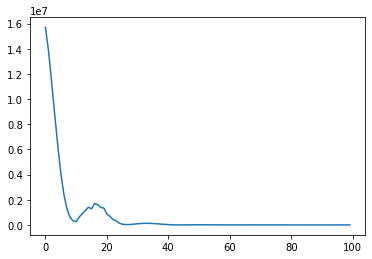

In [16]:
plt.plot(range(len(loss_history_nag[:100])),loss_history_nag[:100])

Text(0, 0.5, 'loss')

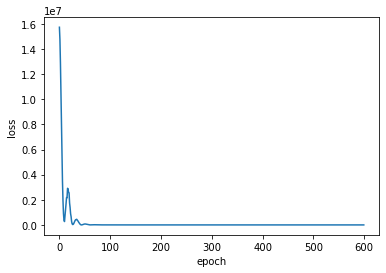

In [17]:
plt.plot(range(len(loss_history_momentum))[:600],loss_history_momentum[:600])
plt.xlabel('epoch')
plt.ylabel('loss')

In [18]:
w

array([[314.87029816,  85.56193596,  14.52295804,  -3.05589506,
         -4.05873634,  -1.64119145]])

In [19]:
print("rmse is ",np.sqrt(loss_history_nag[-10:-1]))

rmse is  [15.06591719 15.51517517 16.43598169 15.64793809 14.33405839 15.09334374
 16.60504818 15.49214118 14.62370303]


In [20]:
Y_pred = np.matmul(x_test,w.reshape((6,-1))) 
rmse = mean_squared_error(Y_test, Y_pred)
print(rmse)

1.7894858564255234


# Parameter Change 

## Momentum Method

In [21]:
import time
lr_set = [0.00001, 0.0001, 0.001]
batch_set = [32, 64, 128, 256]
epoch_size = 1500
gamma_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
rmse = np.zeros((len(lr_set), len(batch_set),len(gamma_list)))
time_record = np.zeros((len(lr_set),len(batch_set),len(gamma_list)))

for i in range(len(lr_set)):
    
    hyper = lr_set[i]
    
    for j in range(len(batch_set)):
        
        for k in range(len(gamma_list)):
            batch = batch_set[j]
        
            start = time.time()
            loss, w_conv = Gradient.momentum_gradient(x_train, Y_train, lr=hyper, epoch=epoch_size, batch_size=batch,gamma=gamma_list[k])
            time_cal = time.time() - start
        
            time_record[i,j,k] = time_cal
            Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
            rmse[i,j,k] = mean_squared_error(Y_test, Y_pred)
            print("learning_rate = ", hyper)
            print("batch_size = ", batch)
        
        

learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_siz

In [22]:
rmse

array([[[9.42880106e+03, 7.18175850e+03, 5.19605398e+03, 3.57466587e+03,
         2.35285799e+03, 1.54999586e+03, 9.78268203e+02, 4.97295144e+02],
        [1.83979073e+03, 1.50047603e+03, 1.20585181e+03, 9.52899576e+02,
         7.19254354e+02, 4.73704906e+02, 2.37502414e+02, 6.10568699e+01],
        [5.89531227e+02, 4.67963843e+02, 3.45657189e+02, 2.35947994e+02,
         1.36901562e+02, 6.05235831e+01, 1.61803996e+01, 2.70227602e+00],
        [9.45455743e+01, 5.97332300e+01, 3.38666254e+01, 1.60725506e+01,
         6.49179649e+00, 2.72342800e+00, 2.05916066e+00, 2.04110012e+00]],

       [[4.30376189e+01, 2.52291633e+01, 1.29176741e+01, 5.98201111e+00,
         2.91776246e+00, 2.09743478e+00, 2.04274149e+00, 2.06073738e+00],
        [2.28524980e+00, 2.08608413e+00, 2.05450190e+00, 2.03697416e+00,
         2.05206869e+00, 2.05018449e+00, 2.04477351e+00, 2.02260804e+00],
        [2.05741771e+00, 2.05156706e+00, 2.04195007e+00, 2.03566944e+00,
         2.02764295e+00, 2.00944431e+00, 2.

In [23]:
np.min(rmse)

1.6978440784870652

In [25]:
Best_Parameter = np.where(rmse==np.min(rmse))
print("Learning Rate",lr_set[Best_Parameter[0][0]])
print("batch size",batch_set[Best_Parameter[1][0]])
print("gamma",gamma_list[Best_Parameter[2][0]])
print("Minimum rmse is",np.min(rmse))

Learning Rate 0.001
batch size 256
gamma 0.8
Minimum rmse is 1.6978440784870652


## Nestrov Accelerated Gradient

In [26]:
import time
lr_set = [0.00001, 0.0001, 0.001]
batch_set = [32, 64, 128, 256]
epoch_size = 1500
gamma_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
rmse_nag = np.zeros((len(lr_set), len(batch_set),len(gamma_list)))
time_record_nag = np.zeros((len(lr_set),len(batch_set),len(gamma_list)))

for i in range(len(lr_set)):
    
    hyper = lr_set[i]
    
    for j in range(len(batch_set)):
        
        for k in range(len(gamma_list)):
            batch = batch_set[j]
        
            start = time.time()
            loss, w_conv = Gradient.nestrov_gradient(x_train, Y_train, lr=hyper, epoch=epoch_size, batch_size=batch,gamma=gamma_list[k])
            time_cal = time.time() - start
        
            time_record_nag[i,j,k] = time_cal
            Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
            rmse_nag[i,j,k] = mean_squared_error(Y_test, Y_pred)
            print("learning_rate = ", hyper)
            print("batch_size = ", batch)
        
        

learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  32
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  64
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_size =  128
learning_rate =  1e-05
batch_siz

In [27]:
rmse_nag

array([[[9.44817317e+03, 7.17260788e+03, 5.22230679e+03, 3.58929065e+03,
         2.36923098e+03, 1.55154437e+03, 9.80689172e+02, 4.96088476e+02],
        [1.85189143e+03, 1.50648620e+03, 1.20657700e+03, 9.57945863e+02,
         7.15183352e+02, 4.71941846e+02, 2.39543640e+02, 6.16553611e+01],
        [5.86377946e+02, 4.66919829e+02, 3.49613227e+02, 2.34229222e+02,
         1.36547453e+02, 6.06421186e+01, 1.62408891e+01, 2.69920521e+00],
        [9.50586869e+01, 6.04673294e+01, 3.43000250e+01, 1.63069310e+01,
         6.47342692e+00, 2.73610931e+00, 2.04663246e+00, 2.04984024e+00]],

       [[4.32522440e+01, 2.52935697e+01, 1.30317744e+01, 6.03437503e+00,
         2.91272565e+00, 2.10777610e+00, 2.06418390e+00, 2.06639139e+00],
        [2.26487326e+00, 2.08426249e+00, 2.04728478e+00, 2.03466297e+00,
         2.04974691e+00, 2.04106630e+00, 2.03736721e+00, 2.01347798e+00],
        [2.05089980e+00, 2.03416513e+00, 2.05338624e+00, 2.04190359e+00,
         2.01060367e+00, 2.00391732e+00, 1.

In [28]:
Best_Parameter = np.where(rmse_nag==np.min(rmse_nag))
print("Learninmomentum_gradientate",lr_set[Best_Parameter[0][0]])
print("batch size",batch_set[Best_Parameter[1][0]])
print("gamma",gamma_list[Best_Parameter[2][0]])
print("Minimum rmse is",np.min(rmse_nag))

Learninmomentum_gradientate 0.001
batch size 256
gamma 0.8
Minimum rmse is 1.6938877645189263


# Comapring Algorithms

* lr :  0.001
* gamma : 0.8
* batch size : 256

In [29]:
rmse_sgd_l = []
for i in range(100):
    loss, w_conv = Gradient.stochastic_gradient(x_train, Y_train, lr=0.001, epoch=1500, batch_size=256)
    Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
    rmse_sgd_temp = mean_squared_error(Y_test, Y_pred)
    rmse_sgd_l.append(rmse_sgd_temp)

In [30]:
rmse_nag_l = []

for i in range(100):
    loss, w_conv = Gradient.nestrov_gradient(x_train, Y_train, lr=0.001, epoch=1500, batch_size=256,gamma=0.8)
    Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
    rmse_nag_temp = mean_squared_error(Y_test, Y_pred)
    rmse_nag_l.append(rmse_nag_temp)
    
    

In [31]:
rmse_moment_l = []
for i in range(100):
    loss, w_conv = Gradient.momentum_gradient(x_train, Y_train, lr=0.001, epoch=1500, batch_size=256,gamma=0.8)
    Y_pred = np.matmul(x_test,w_conv.reshape((6,-1))) 
    rmse_moment_temp = mean_squared_error(Y_test, Y_pred)
    rmse_moment_l.append(rmse_moment_temp)
    del loss
    del w_conv
    del rmse_moment_temp
    

Text(0, 0.5, 'MSE')

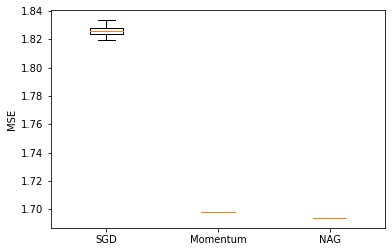

In [32]:
plt.boxplot([rmse_sgd_l,rmse_moment_l,rmse_nag_l])
plt.xticks([1, 2,3],  ['SGD', 'Momentum','NAG'])
plt.ylabel('MSE')